<a href="https://colab.research.google.com/github/eomtaehyeon/Hongong_ML-DL-/blob/main/Chapter_6_3_%EC%97%84%ED%83%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석
- 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어 보자.


## 차원과 차원 축소
- 차원 : 데이터가 가진 속성 = 특성 = 차원
- 차원 축소 : 비지도 학습 작업
  + 주성분 분석 : PCA

## 주성분 분석 소개
- 주성분 분석은 데이터에 있는 분산이 큰방향을 찾는 것
- 사이킷런의 PCA 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰준다.


## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2022-03-31 14:43:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 14:43:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 14:43:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


- n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50.
- 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000.


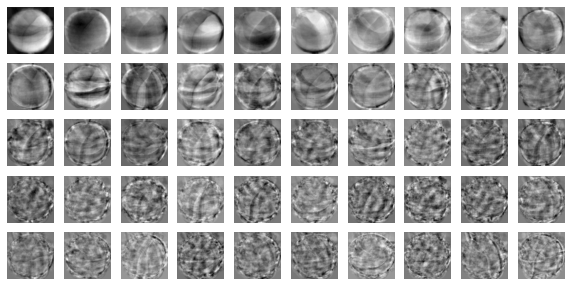

In [3]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

- 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.
- 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일수 있다.

In [4]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 데이터의 원래 크기 대비해서 1/200 줄임
- 용량이 줄었다는 것과 똑같음

## 원본 데이터 재구성
- inverse_transform() 메서드로 복원.

In [5]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


- 이데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력.

In [6]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


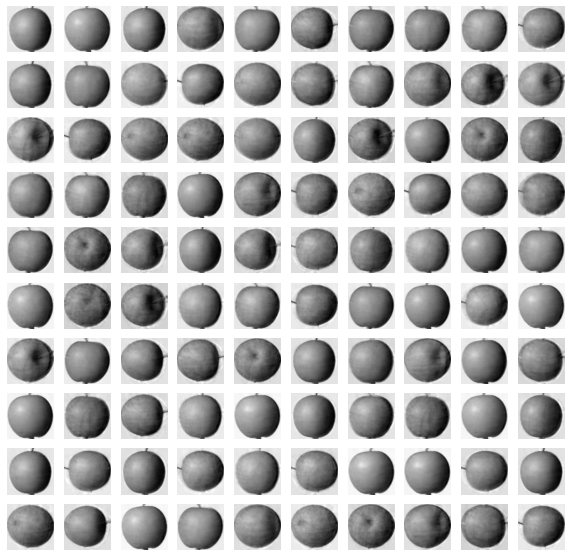

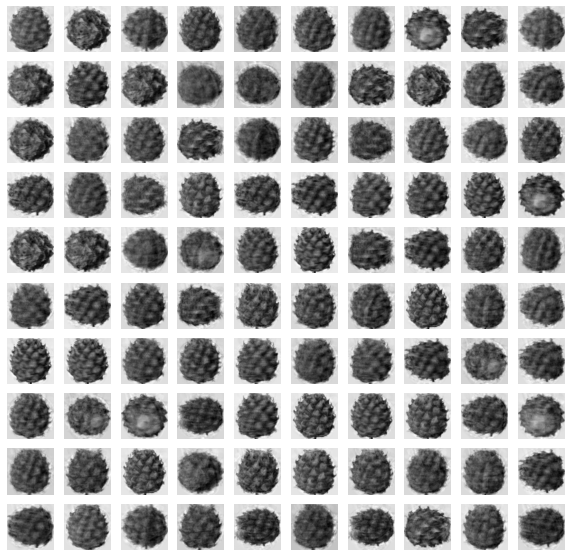

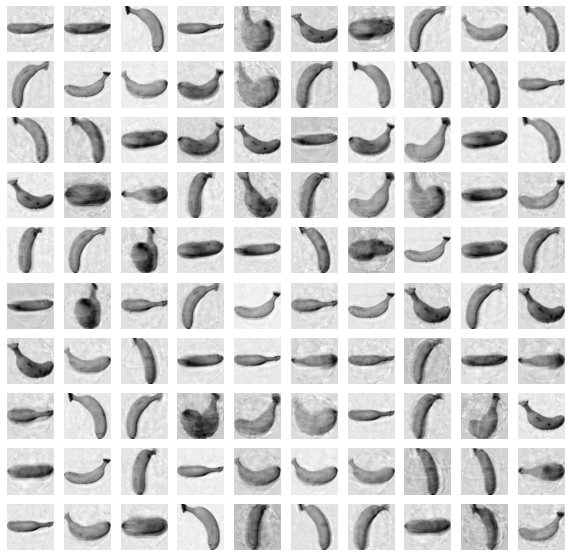

In [7]:
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

- 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10,000개로 늘린 것은 대단함.
- 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것.
- 50개의 특성은 얼마나 분산을 보존하고 있는 것일까?


## 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값.
- PCA클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록.
- 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음.

In [8]:
print(np.sum(pca.explained_variance_ratio_))

0.9215625585208868


- 92%가 넘는 분산을 유지.
- 설명된 분산을 그래프

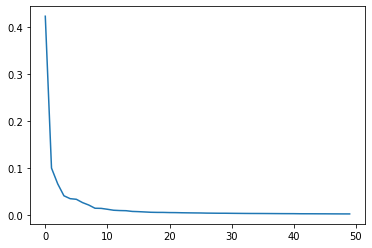

In [9]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현.


## 다른 알고리즘과 함께 사용하기
- 과일사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용.
- 3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델 사용.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

- 사과 : 0, 파인애플 : 1, 바나나 : 2

In [10]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [13]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5490780353546143


- 교차 검증의 점수 0.997

In [14]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02732372283935547


- 50개 특성만 사용했는데, 정확도가 100% 훈련시간은 50배 가량 감소.
 

In [15]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [16]:
print(pca.n_components_)

2


- 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현.

In [17]:
# 이 모델로 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


- 변환된 데이터의 크기는 (300,2)

In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04132099151611328


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 2개의 특성을 사용 99%의 정확도

In [20]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


- 클러스터는 각각 110, 99, 91개의 샘플을 포함

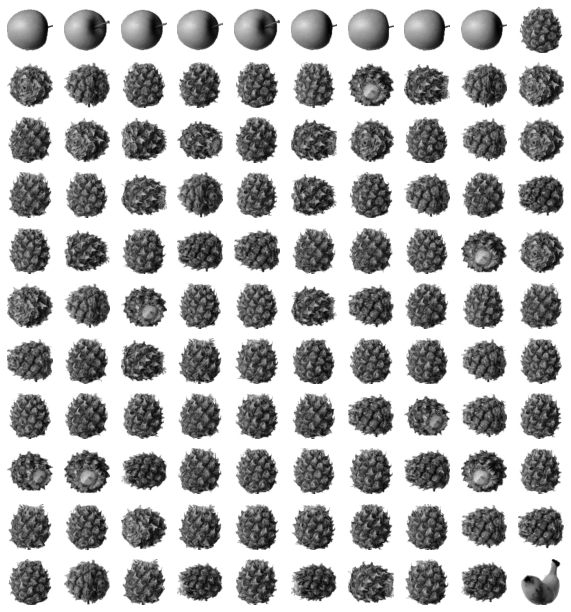

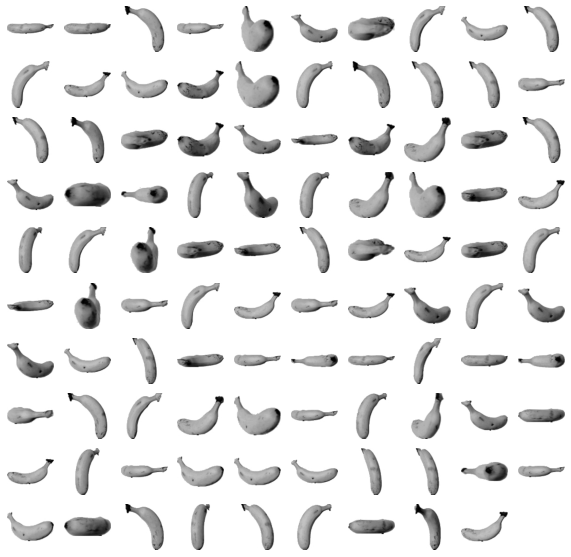

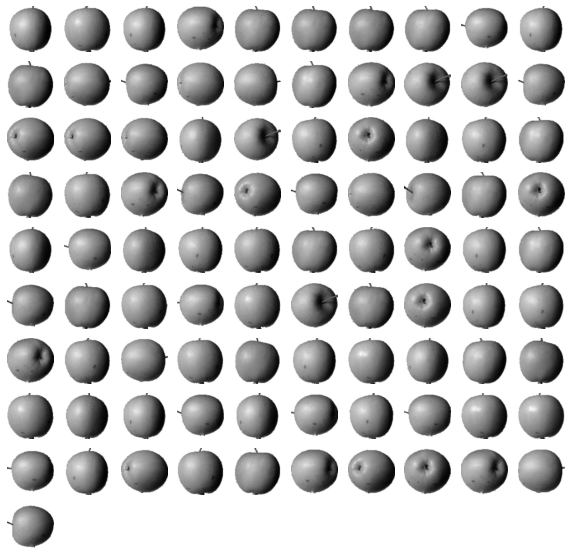

In [21]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

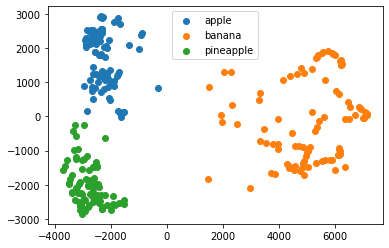

In [22]:
# 클러스터의 산점도 시각화
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

- 사과와 파인애플이 가깝게 붙어 있어 혼동을 일으키기 쉬울 것 같다.